# Title : Youtube Statistics Analysis 2023

### 팀원 정보
2018111479 김남민

In [456]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import requests
from io import BytesIO
from PIL import Image
pd.set_option('display.max_columns', None)

## 1. 데이터셋 불러오고 확인하기

In [457]:
df = pd.read_csv('./data/Global_YouTube_Statistics.csv', encoding='latin-1')
df.head(10)

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,1.0,1.0,1.0,2.258000e+09,564600.0,9000000.00,6800000.00,1.084000e+08,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,4055159.0,7670.0,7423.0,1.200000e+01,0.0,0.05,0.04,5.800000e-01,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,48.0,1.0,1.0,1.348000e+09,337000.0,5400000.00,4000000.00,6.470000e+07,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,2.0,2.0,1.0,1.975000e+09,493800.0,7900000.00,5900000.00,9.480000e+07,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,3.0,2.0,2.0,1.824000e+09,455900.0,7300000.00,5500000.00,8.750000e+07,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
5,6,Music,119000000,0.000000e+00,NaN,Music,0,NaN,NaN,Music,4057944.0,NaN,NaN,NaN,0.0,0.00,0.00,0.000000e+00,NaN,2013.0,Sep,24.0,NaN,NaN,NaN,NaN,NaN,NaN
6,7,ýýý Kids Diana Show,112000000,9.324704e+10,People & Blogs,ýýý Kids Diana Show,1111,United States,US,Entertainment,5.0,3.0,3.0,7.316740e+08,182900.0,2900000.00,2200000.00,3.510000e+07,NaN,2015.0,May,12.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
7,8,PewDiePie,111000000,2.905804e+10,Gaming,PewDiePie,4716,Japan,JP,Entertainment,44.0,1.0,4.0,3.918400e+07,9800.0,156700.00,117600.00,1.900000e+06,NaN,2010.0,Apr,29.0,63.2,1.262266e+08,2.29,115782416.0,36.204824,138.252924
8,9,Like Nastya,106000000,9.047906e+10,People & Blogs,Like Nastya Vlog,493,Russia,RU,People,630.0,5.0,25.0,4.894700e+07,12200.0,195800.00,146800.00,2.300000e+06,100000.0,2016.0,Jan,14.0,81.9,1.443735e+08,4.59,107683889.0,61.524010,105.318756
9,10,Vlad and Niki,98900000,7.718017e+10,Entertainment,Vlad and Niki,574,United States,US,Entertainment,8.0,5.0,6.0,5.805740e+08,145100.0,2300000.00,1700000.00,2.790000e+07,600000.0,2018.0,Apr,23.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891


In [458]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video views                              995 non-null    float64
 4   category                                 949 non-null    object 
 5   Title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   Country                                  873 non-null    object 
 8   Abbreviation                             873 non-null    object 
 9   channel_type                             965 non-null    object 
 10  video_views_rank                         994 non-n

In [459]:
df.describe()

,rank,subscribers,video views,uploads,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
count,995.00000,9.950000e+02,9.950000e+02,995.000000,9.940000e+02,879.000000,962.000000,9.390000e+02,995.000000,9.950000e+02,9.950000e+02,9.950000e+02,6.580000e+02,990.000000,990.000000,872.000000,8.720000e+02,872.000000,8.720000e+02,872.000000,872.000000
mean,498.00000,2.298241e+07,1.103954e+10,9187.125628,5.542489e+05,386.053470,745.719335,1.756103e+08,36886.148281,5.898078e+05,4.422574e+05,7.081814e+06,3.490791e+05,2012.630303,15.746465,63.627752,4.303873e+08,9.279278,2.242150e+08,26.632783,-14.128146
std,287.37606,1.752611e+07,1.411084e+10,34151.352254,1.362782e+06,1232.244746,1944.386561,4.163782e+08,71858.724092,1.148622e+06,8.612161e+05,1.379704e+07,6.143554e+05,4.512503,8.777520,26.106893,4.727947e+08,4.888354,1.546874e+08,20.560533,84.760809
min,1.00000,1.230000e+07,0.000000e+00,0.000000,1.000000e+00,1.000000,1.000000,1.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1970.000000,1.000000,7.600000,2.025060e+05,0.750000,3.558800e+04,-38.416097,-172.104629
25%,249.50000,1.450000e+07,4.288145e+09,194.500000,3.230000e+02,11.000000,27.000000,2.013750e+07,2700.000000,4.350000e+04,3.265000e+04,5.217500e+05,1.000000e+05,2009.000000,8.000000,36.300000,8.335541e+07,5.270000,5.590832e+07,20.593684,-95.712891
50%,498.00000,1.770000e+07,7.760820e+09,729.000000,9.155000e+02,51.000000,65.500000,6.408500e+07,13300.000000,2.127000e+05,1.595000e+05,2.600000e+06,2.000000e+05,2013.000000,16.000000,68.000000,3.282395e+08,9.365000,2.706630e+08,37.090240,-51.925280
75%,746.50000,2.460000e+07,1.355470e+10,2667.500000,3.584500e+03,123.000000,139.750000,1.688265e+08,37900.000000,6.068000e+05,4.551000e+05,7.300000e+06,4.000000e+05,2016.000000,23.000000,88.200000,3.282395e+08,14.700000,2.706630e+08,37.090240,78.962880
max,995.00000,2.450000e+08,2.280000e+11,301308.000000,4.057944e+06,7741.000000,7741.000000,6.589000e+09,850900.000000,1.360000e+07,1.020000e+07,1.634000e+08,8.000000e+06,2022.000000,31.000000,113.100000,1.397715e+09,14.720000,8.429340e+08,61.924110,138.252924


# 2. 데이터 Cleaing & Transformation

## 2.1 Column 알아보기

In [460]:
print(df.columns)

Index(['rank', 'Youtuber', 'subscribers', 'video views', 'category', 'Title',
       'uploads', 'Country', 'Abbreviation', 'channel_type',
       'video_views_rank', 'country_rank', 'channel_type_rank',
       'video_views_for_the_last_30_days', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'subscribers_for_last_30_days',
       'created_year', 'created_month', 'created_date',
       'Gross tertiary education enrollment (%)', 'Population',
       'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude'],
      dtype='object')


👇 분석하는 동안 사용할 데이터프레임 복사본 생성.

In [461]:
df = df.copy()

👇 Column의 naming 규칙이 일관되지 않기 때문에 수정.

In [462]:
df.columns = df.columns.str.replace('_', ' ').str.title()
print(df.columns)

Index(['Rank', 'Youtuber', 'Subscribers', 'Video Views', 'Category', 'Title',
       'Uploads', 'Country', 'Abbreviation', 'Channel Type',
       'Video Views Rank', 'Country Rank', 'Channel Type Rank',
       'Video Views For The Last 30 Days', 'Lowest Monthly Earnings',
       'Highest Monthly Earnings', 'Lowest Yearly Earnings',
       'Highest Yearly Earnings', 'Subscribers For Last 30 Days',
       'Created Year', 'Created Month', 'Created Date',
       'Gross Tertiary Education Enrollment (%)', 'Population',
       'Unemployment Rate', 'Urban Population', 'Latitude', 'Longitude'],
      dtype='object')


## 2.2 Duplicate Data

In [463]:
duplicates = df.duplicated()
duplicate_rows = df[duplicates]
print(duplicate_rows)

Empty DataFrame
Columns: [Rank, Youtuber, Subscribers, Video Views, Category, Title, Uploads, Country, Abbreviation, Channel Type, Video Views Rank, Country Rank, Channel Type Rank, Video Views For The Last 30 Days, Lowest Monthly Earnings, Highest Monthly Earnings, Lowest Yearly Earnings, Highest Yearly Earnings, Subscribers For Last 30 Days, Created Year, Created Month, Created Date, Gross Tertiary Education Enrollment (%), Population, Unemployment Rate, Urban Population, Latitude, Longitude]
Index: []


#### => duplicated rows 없음.

## 2.3 Missing Value

In [464]:
# df에서 missing value count하기
missing_values_count = df.isnull().sum()
# Display the count of missing values for incomplete columns
missing_values_count[missing_values_count > 0]

Category                                    46
Country                                    122
Abbreviation                               122
Channel Type                                30
Video Views Rank                             1
Country Rank                               116
Channel Type Rank                           33
Video Views For The Last 30 Days            56
Subscribers For Last 30 Days               337
Created Year                                 5
Created Month                                5
Created Date                                 5
Gross Tertiary Education Enrollment (%)    123
Population                                 123
Unemployment Rate                          123
Urban Population                           123
Latitude                                   123
Longitude                                  123
dtype: int64

In [465]:
# missing value가 있는 행을 모두 출력
df[df.isnull().any(axis=1)]

,Rank,Youtuber,Subscribers,Video Views,Category,Title,Uploads,Country,Abbreviation,Channel Type,Video Views Rank,Country Rank,Channel Type Rank,Video Views For The Last 30 Days,Lowest Monthly Earnings,Highest Monthly Earnings,Lowest Yearly Earnings,Highest Yearly Earnings,Subscribers For Last 30 Days,Created Year,Created Month,Created Date,Gross Tertiary Education Enrollment (%),Population,Unemployment Rate,Urban Population,Latitude,Longitude
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,4055159.0,7670.0,7423.0,12.0,0.0,0.05,0.04,0.58,NaN,2006.0,Mar,5.0,88.2,328239523.0,14.70,270663028.0,37.090240,-95.712891
5,6,Music,119000000,0.000000e+00,NaN,Music,0,NaN,NaN,Music,4057944.0,NaN,NaN,NaN,0.0,0.00,0.00,0.00,NaN,2013.0,Sep,24.0,NaN,NaN,NaN,NaN,NaN,NaN
6,7,ýýý Kids Diana Show,112000000,9.324704e+10,People & Blogs,ýýý Kids Diana Show,1111,United States,US,Entertainment,5.0,3.0,3.0,731674000.0,182900.0,2900000.00,2200000.00,35100000.00,NaN,2015.0,May,12.0,88.2,328239523.0,14.70,270663028.0,37.090240,-95.712891
7,8,PewDiePie,111000000,2.905804e+10,Gaming,PewDiePie,4716,Japan,JP,Entertainment,44.0,1.0,4.0,39184000.0,9800.0,156700.00,117600.00,1900000.00,NaN,2010.0,Apr,29.0,63.2,126226568.0,2.29,115782416.0,36.204824,138.252924
12,13,Gaming,93600000,0.000000e+00,NaN,Gaming,0,NaN,NaN,Games,4057944.0,NaN,1.0,NaN,0.0,0.00,0.00,0.00,NaN,2013.0,Dec,15.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983,984,MoniLina,12400000,1.608681e+10,Comedy,MoniLinaFamily,0,United States,US,People,4057944.0,2774.0,2499.0,NaN,0.0,0.00,0.00,0.00,100.0,2016.0,May,10.0,88.2,328239523.0,14.70,270663028.0,37.090240,-95.712891
985,986,TKOR,12400000,3.392023e+09,Education,TKoR,0,NaN,NaN,People,4057944.0,NaN,7741.0,NaN,0.0,0.00,0.00,0.00,NaN,2006.0,Aug,16.0,NaN,NaN,NaN,NaN,NaN,NaN
986,987,ANNA KOVA,12400000,1.395959e+10,People & Blogs,annakova,1,NaN,NaN,Film,4049634.0,NaN,5307.0,2.0,0.0,0.01,0.01,0.10,NaN,2006.0,Jun,18.0,NaN,NaN,NaN,NaN,NaN,NaN
987,988,Avril Lavigne,12400000,6.202090e+09,Music,Avril Lavigne,205,United States,US,Music,999.0,176.0,150.0,50188000.0,12500.0,200800.00,150600.00,2400000.00,NaN,2005.0,Oct,8.0,88.2,328239523.0,14.70,270663028.0,37.090240,-95.712891


In [466]:
# country가 Andorra인 행을 모두 출력
df[df['Country'] == 'Andorra']

# 그 행의 Population, Latitude, Longitude, Urban Population, Unemployment Rate에 값 채우기
df.loc[df['Country'] == 'Andorra', 'Population'] = 80088
df.loc[df['Country'] == 'Andorra', 'Latitude'] = 42.506317
df.loc[df['Country'] == 'Andorra', 'Longitude'] = 1.521835
df.loc[df['Country'] == 'Andorra', 'Urban Population'] = 70094
df.loc[df['Country'] == 'Andorra', 'Unemployment Rate'] = 2.1

In [467]:
# Video Views Rank가 missing value인 행을 모두 출력
df[df['Video Views Rank'].isnull()]

,Rank,Youtuber,Subscribers,Video Views,Category,Title,Uploads,Country,Abbreviation,Channel Type,Video Views Rank,Country Rank,Channel Type Rank,Video Views For The Last 30 Days,Lowest Monthly Earnings,Highest Monthly Earnings,Lowest Yearly Earnings,Highest Yearly Earnings,Subscribers For Last 30 Days,Created Year,Created Month,Created Date,Gross Tertiary Education Enrollment (%),Population,Unemployment Rate,Urban Population,Latitude,Longitude
735,736,LEGENDA FUNK,14500000,2.440718e+09,Music,LegendaFUNK,0,Brazil,BR,Music,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,51.3,212559417.0,12.08,183241641.0,-14.235004,-51.92528


In [499]:
df.loc[df['Youtuber'] == 'LEGENDA FUNK', 'Uploads'] = 6138
df.loc[df['Youtuber'] == 'LEGENDA FUNK', 'Created Year'] = 2013.0
df.loc[df['Youtuber'] == 'LEGENDA FUNK', 'Created Month'] = 'May'
df.loc[df['Youtuber'] == 'LEGENDA FUNK', 'Created Date'] = 11.0

In [501]:
# Country가 Brazil인 행의 Country Rank를 모두 출력
df[df['Country'] == 'Brazil']

,Rank,Youtuber,Subscribers,Video Views,Category,Title,Uploads,Country,Abbreviation,Channel Type,Video Views Rank,Country Rank,Channel Type Rank,Video Views For The Last 30 Days,Lowest Monthly Earnings,Highest Monthly Earnings,Lowest Yearly Earnings,Highest Yearly Earnings,Subscribers For Last 30 Days,Created Year,Created Month,Created Date,Gross Tertiary Education Enrollment (%),Population,Unemployment Rate,Urban Population,Latitude,Longitude,Subscribers (mn.),Video Views (bn.),Uploads (k.)
19,24,Canal KondZilla,66500000,36775585925,Music,Canal KondZilla,2572,Brazil,BR,Music,25,1,7,447223000,0.0,0.0,0.0,0.0,0,2012,Mar,21.0,51.3,212559417,12.08,183241641,-14.235004,-51.92528,66,36,2.572
50,55,Felipe Neto,45200000,16602198273,Entertainment,Felipe Neto,4331,Brazil,BR,Entertainment,174,2,14,130359000,32600.0,521400.0,391100.0,6300000.0,200000,2006,May,16.0,51.3,212559417,12.08,183241641,-14.235004,-51.92528,45,16,4.331
51,56,Voc,44700000,7828610828,Entertainment,Voc,1558,Brazil,BR,Entertainment,681,3,15,48032000,12000.0,192100.0,144100.0,2300000.0,100000,2013,Sep,1.0,51.3,212559417,12.08,183241641,-14.235004,-51.92528,44,7,1.558
55,60,whinderssonnunes,44200000,4274709210,Comedy,whinderssonnunes,558,Brazil,BR,Comedy,1741,4,1,26683000,6700.0,106700.0,80100.0,1300000.0,0,2013,Jan,21.0,51.3,212559417,12.08,183241641,-14.235004,-51.92528,44,4,0.558
78,84,GR6 EXPLODE,38900000,25154232306,Music,GR6 EXPLODE,3043,Brazil,BR,Music,73,6,30,1635000000,408700.0,6500000.0,4900000.0,78500000.0,100000,2014,Aug,5.0,51.3,212559417,12.08,183241641,-14.235004,-51.92528,38,25,3.043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
916,941,Piuzinho,12700000,1081285962,Gaming,Piuzinho,504,Brazil,BR,Games,10642,53,67,3619000,905.0,14500.0,10900.0,173700.0,0,2015,May,13.0,51.3,212559417,12.08,183241641,-14.235004,-51.92528,12,1,0.504
935,960,Parafernalha,12500000,4625777945,Entertainment,Parafernalha,1888,Brazil,BR,Entertainment,1532,54,171,7158000,1800.0,28600.0,21500.0,343600.0,0,2011,May,13.0,51.3,212559417,12.08,183241641,-14.235004,-51.92528,12,4,1.888
941,966,Mundo Bita,12500000,16690788752,Music,Mundo Bita,253,Brazil,BR,Music,171,54,149,213700000,53400.0,854800.0,641100.0,10300000.0,100000,2011,Sep,29.0,51.3,212559417,12.08,183241641,-14.235004,-51.92528,12,16,0.253
951,976,Gustavo Par,12400000,2602614088,Comedy,GustavoParodias,9,Brazil,BR,Comedy,4050768,5075,4894,0,0.0,0.0,0.0,0.0,0,2010,Aug,24.0,51.3,212559417,12.08,183241641,-14.235004,-51.92528,12,2,0.009


👇 객체 데이터 유형 (object data type) column에서 누락된 값을 'Unknown'으로 바꾼다.

In [468]:
categorical_columns = df.select_dtypes(include = ['object']).columns
df[categorical_columns] = df[categorical_columns].fillna('Unknown')

👇 수치형 데이터 유형 (numerical data type) column에서 누락된 값을 'Unknown'으로 바꾼다.

In [469]:
numerical_columns = df.select_dtypes(include = ['float', 'int64']).columns
df[numerical_columns] = df[numerical_columns].fillna(0)

👇 결측치 재확인 절차

In [470]:
missing_values_count = df.isnull().sum()
missing_values_count[missing_values_count > 0]

Series([], dtype: int64)

## 2-4. Data Type

In [471]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    object 
 2   Subscribers                              995 non-null    int64  
 3   Video Views                              995 non-null    float64
 4   Category                                 995 non-null    object 
 5   Title                                    995 non-null    object 
 6   Uploads                                  995 non-null    int64  
 7   Country                                  995 non-null    object 
 8   Abbreviation                             995 non-null    object 
 9   Channel Type                             995 non-null    object 
 10  Video Views Rank                         995 non-n

#### => 데이터의 특성을 고려할 때, float columns 들을 integer 형으로 변환 하는 것이 더 나을 것 같다.

In [472]:
# Convert several float data typescolumns to integars
df = df.astype({
    'Video Views': 'int64',
    'Video Views Rank': 'int64',
    'Country Rank': 'int64',
    'Channel Type Rank': 'int64',
    'Video Views For The Last 30 Days': 'int64',
    'Subscribers For Last 30 Days': 'int64',
    'Created Year': 'int64',
    'Population': 'int64',
    'Urban Population': 'int64'
})

# Validate results of datatype change
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    object 
 2   Subscribers                              995 non-null    int64  
 3   Video Views                              995 non-null    int64  
 4   Category                                 995 non-null    object 
 5   Title                                    995 non-null    object 
 6   Uploads                                  995 non-null    int64  
 7   Country                                  995 non-null    object 
 8   Abbreviation                             995 non-null    object 
 9   Channel Type                             995 non-null    object 
 10  Video Views Rank                         995 non-n

## 2-5. Remove & Replace Unwanted Characters

몇 몇 YouTube 채널 이름에는 분석/구분을 어렵게 만드는 특수 문자가 포함되어 있는데, 실제 연구에서는 특정 값으로 대체하는 적절한 솔루션을 찾겠지만, 본 조의 분석에서는 non-alphanumeric characters를 제거하는 것으로 충분하다고 판단했다.

In [473]:
pattern = r'[^a-zA-Z0-9\s.,!?&\'-]'

df['Youtuber'] = df['Youtuber'].str.replace(pattern, '')
df['Title'] = df['Title'].str.replace(pattern, '')

/var/folders/5r/bcxwxb6x521399lvd_5y9jwm0000gn/T/ipykernel_26761/1961385737.py:3: FutureWarning:

The default value of regex will change from True to False in a future version.

/var/folders/5r/bcxwxb6x521399lvd_5y9jwm0000gn/T/ipykernel_26761/1961385737.py:4: FutureWarning:

The default value of regex will change from True to False in a future version.



In [474]:
# 후행/선행 공백 제거
df['Youtuber'] = df['Youtuber'].str.strip()
df['Title'] = df['Title'].str.strip()

In [475]:
# remove & replace를 검증하기 위해 df의 filtered view 생성.
filter_youtuber_rows = df['Youtuber'].str.contains(pattern, regex = True)
filter_title_rows = df['Title'].str.contains(pattern, regex = True)
# Validate results of string remove & replace
filter_youtuber_rows_results = filter_youtuber_rows[filter_youtuber_rows == True]
print(filter_youtuber_rows_results)
filter_title_rows_results = filter_title_rows[filter_title_rows == True]
print(filter_title_rows_results)

Series([], Name: Youtuber, dtype: bool)
Series([], Name: Title, dtype: bool)


## 2-6. Remove Unwanted Rows

👇 동영상 조회수가 0인 YouTube 채널이 여러 개 있는데, 이는 YouTube의 Topic 종류이고 유효한 채널이 아닌 것으로 보인다. 따라서 이러한 행은 전부 삭제한다.

In [476]:
# 비디오 조회수가 0인 행을 모두 출력
filtered_df = df[df['Video Views'] == 0]
filtered_df

,Rank,Youtuber,Subscribers,Video Views,Category,Title,Uploads,Country,Abbreviation,Channel Type,Video Views Rank,Country Rank,Channel Type Rank,Video Views For The Last 30 Days,Lowest Monthly Earnings,Highest Monthly Earnings,Lowest Yearly Earnings,Highest Yearly Earnings,Subscribers For Last 30 Days,Created Year,Created Month,Created Date,Gross Tertiary Education Enrollment (%),Population,Unemployment Rate,Urban Population,Latitude,Longitude
1,2,YouTube Movies,170000000,0,Film & Animation,youtubemovies,1,United States,US,Games,4055159,7670,7423,12,0.0,0.05,0.04,0.58,0,2006,Mar,5.0,88.2,328239523,14.7,270663028,37.09024,-95.712891
5,6,Music,119000000,0,Unknown,Music,0,Unknown,Unknown,Music,4057944,0,0,0,0.0,0.00,0.00,0.00,0,2013,Sep,24.0,0.0,0,0.0,0,0.00000,0.000000
12,13,Gaming,93600000,0,Unknown,Gaming,0,Unknown,Unknown,Games,4057944,0,1,0,0.0,0.00,0.00,0.00,0,2013,Dec,15.0,0.0,0,0.0,0,0.00000,0.000000
18,19,Sports,75000000,0,Unknown,sports,3,United States,US,Entertainment,3898122,6266,5395,16,0.0,0.06,0.05,0.77,0,2006,Jan,30.0,88.2,328239523,14.7,270663028,37.09024,-95.712891
102,103,News,36300000,0,Unknown,News,0,Unknown,Unknown,Unknown,4057944,0,0,0,0.0,0.00,0.00,0.00,0,2013,Sep,9.0,0.0,0,0.0,0,0.00000,0.000000
173,174,Popular on YouTube,29300000,0,Unknown,Popular on Youtube,3,Unknown,Unknown,Education,4019724,0,4847,1,0.0,0.00,0.00,0.05,0,2017,Aug,7.0,0.0,0,0.0,0,0.00000,0.000000
360,361,Minecraft - Topic,20900000,0,Unknown,Minecraft - Topic,0,Unknown,Unknown,Games,4057944,0,24,0,0.0,0.00,0.00,0.00,300000,2013,Dec,20.0,0.0,0,0.0,0,0.00000,0.000000
592,593,Live,16100000,0,Unknown,Live,0,Unknown,Unknown,Unknown,4057944,0,0,0,0.0,0.00,0.00,0.00,0,2015,Jan,13.0,0.0,0,0.0,0,0.00000,0.000000


In [477]:
# Remove rows from with 0 video views
for x in df.index:
    if df.loc[x, 'Video Views'] == 0:
        df.drop(x, inplace = True)
        
# Validate the results        
filtered_df = df[df['Video Views'] == 0]
filtered_df

,Rank,Youtuber,Subscribers,Video Views,Category,Title,Uploads,Country,Abbreviation,Channel Type,Video Views Rank,Country Rank,Channel Type Rank,Video Views For The Last 30 Days,Lowest Monthly Earnings,Highest Monthly Earnings,Lowest Yearly Earnings,Highest Yearly Earnings,Subscribers For Last 30 Days,Created Year,Created Month,Created Date,Gross Tertiary Education Enrollment (%),Population,Unemployment Rate,Urban Population,Latitude,Longitude


👇 YouTuber column을 처리한 결과, 유효한 이름이 없는 YouTube 채널(특수 문자만 포함되어 있는 채널)이 있음을 알 수 있었는데 이러한 값들은 제거한다. 실제 연구에서는 위에서 언급한 것처럼 이러한 특수 문자 값을 적절한 대체 항목으로 대체하지만, 본 조의 분석에서는 이러한 행을 삭제하는 것으로 충분하다고 판단했다.

In [478]:
# Filter for YouTube channels with a blank 'Youtuber' name
filtered_df = df[df['Youtuber'] == '']
filtered_df

,Rank,Youtuber,Subscribers,Video Views,Category,Title,Uploads,Country,Abbreviation,Channel Type,Video Views Rank,Country Rank,Channel Type Rank,Video Views For The Last 30 Days,Lowest Monthly Earnings,Highest Monthly Earnings,Lowest Yearly Earnings,Highest Yearly Earnings,Subscribers For Last 30 Days,Created Year,Created Month,Created Date,Gross Tertiary Education Enrollment (%),Population,Unemployment Rate,Urban Population,Latitude,Longitude
64,65,,43200000,36458726976,Film & Animation,,1478,Russia,RU,Education,26,2,6,303780000,75900.0,1200000.0,911300.0,14600000.0,300000,2011,May,31.0,81.9,144373535,4.59,107683889,61.524010,105.318756
161,162,,30400000,17999961915,Unknown,,532,United States,US,Entertainment,147,46,46,122926000,30700.0,491700.0,368800.0,5900000.0,300000,2018,Nov,3.0,88.2,328239523,14.70,270663028,37.090240,-95.712891
433,434,,19000000,4924054368,Education,,60,United States,US,Entertainment,1399,116,111,21587000,5400.0,86300.0,64800.0,1000000.0,100000,2018,Feb,20.0,88.2,328239523,14.70,270663028,37.090240,-95.712891
447,448,,18800000,9594188708,Entertainment,,530,Ukraine,UA,Entertainment,483,2,113,68006000,17000.0,272000.0,204000.0,3300000.0,100000,2014,Oct,20.0,82.7,44385155,8.88,30835699,48.379433,31.165580
561,562,,16500000,2440934034,Entertainment,,421,United States,US,Entertainment,3778,137,133,21953000,5500.0,87800.0,65900.0,1100000.0,200000,2014,Mar,9.0,88.2,328239523,14.70,270663028,37.090240,-95.712891
606,607,,15900000,1845329502,People & Blogs,Kung Fu Padla,0,Russia,RU,Games,4057944,3309,5665,0,0.0,0.0,0.0,0.0,10,2017,May,27.0,81.9,144373535,4.59,107683889,61.524010,105.318756
632,633,,15500000,8265129639,Shows,,1021,Saudi Arabia,SA,Film,619,4,33,135036000,33800.0,540100.0,405100.0,6500000.0,300000,2017,May,16.0,68.0,34268528,5.93,28807838,23.885942,45.079162
700,701,,14900000,439098,People & Blogs,,1,Russia,RU,News,3609784,10,19,7697,2.0,31.0,23.0,369.0,0,2008,Aug,11.0,81.9,144373535,4.59,107683889,61.524010,105.318756
707,708,,14800000,7018015062,Howto & Style,,2387,Ukraine,UA,Howto,828,3,25,47117000,11800.0,188500.0,141400.0,2300000.0,0,2015,Oct,12.0,82.7,44385155,8.88,30835699,48.379433,31.165580
714,715,,14700000,2230986039,Entertainment,,1385,Saudi Arabia,SA,Entertainment,4276,5,149,2694000,673.0,10800.0,8100.0,129300.0,0,2016,May,27.0,68.0,34268528,5.93,28807838,23.885942,45.079162


In [479]:
# Remove rows from with blank Youtuber as these are channels with only special characters
for x in df.index:
    if df.loc[x, 'Youtuber'] == '':
        df.drop(x, inplace = True)

# Validate the results
filtered_df = df[df['Youtuber'] == '']
filtered_df

,Rank,Youtuber,Subscribers,Video Views,Category,Title,Uploads,Country,Abbreviation,Channel Type,Video Views Rank,Country Rank,Channel Type Rank,Video Views For The Last 30 Days,Lowest Monthly Earnings,Highest Monthly Earnings,Lowest Yearly Earnings,Highest Yearly Earnings,Subscribers For Last 30 Days,Created Year,Created Month,Created Date,Gross Tertiary Education Enrollment (%),Population,Unemployment Rate,Urban Population,Latitude,Longitude


## 2-7. Sorting the DataFrame & Resetting the Index

👇 구독자 수를 기준으로 내림차순으로 값을 정렬한다.

In [480]:
df.sort_values(by = 'Subscribers', ascending = False)
df

,Rank,Youtuber,Subscribers,Video Views,Category,Title,Uploads,Country,Abbreviation,Channel Type,Video Views Rank,Country Rank,Channel Type Rank,Video Views For The Last 30 Days,Lowest Monthly Earnings,Highest Monthly Earnings,Lowest Yearly Earnings,Highest Yearly Earnings,Subscribers For Last 30 Days,Created Year,Created Month,Created Date,Gross Tertiary Education Enrollment (%),Population,Unemployment Rate,Urban Population,Latitude,Longitude
0,1,T-Series,245000000,228000000000,Music,T-Series,20082,India,IN,Music,1,1,1,2258000000,564600.0,9000000.0,6800000.0,108400000.0,2000000,2006,Mar,13.0,28.1,1366417754,5.36,471031528,20.593684,78.962880
2,3,MrBeast,166000000,28368841870,Entertainment,MrBeast,741,United States,US,Entertainment,48,1,1,1348000000,337000.0,5400000.0,4000000.0,64700000.0,8000000,2012,Feb,20.0,88.2,328239523,14.70,270663028,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,164000000000,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,2,2,1,1975000000,493800.0,7900000.0,5900000.0,94800000.0,1000000,2006,Sep,1.0,88.2,328239523,14.70,270663028,37.090240,-95.712891
4,5,SET India,159000000,148000000000,Shows,SET India,116536,India,IN,Entertainment,3,2,2,1824000000,455900.0,7300000.0,5500000.0,87500000.0,1000000,2006,Sep,20.0,28.1,1366417754,5.36,471031528,20.593684,78.962880
6,7,Kids Diana Show,112000000,93247040539,People & Blogs,Kids Diana Show,1111,United States,US,Entertainment,5,3,3,731674000,182900.0,2900000.0,2200000.0,35100000.0,0,2015,May,12.0,88.2,328239523,14.70,270663028,37.090240,-95.712891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,991,Natan por A,12300000,9029609749,Sports,Natan por A,1200,Brazil,BR,Entertainment,525,55,172,552513000,138100.0,2200000.0,1700000.0,26500000.0,700000,2017,Feb,12.0,51.3,212559417,12.08,183241641,-14.235004,-51.925280
991,992,Free Fire India Official,12300000,1674409945,People & Blogs,Free Fire India Official,1500,India,IN,Games,6141,125,69,64735000,16200.0,258900.0,194200.0,3100000.0,300000,2018,Sep,14.0,28.1,1366417754,5.36,471031528,20.593684,78.962880
992,993,Panda,12300000,2214684303,Unknown,HybridPanda,2452,United Kingdom,GB,Games,129005,867,1202,67035,17.0,268.0,201.0,3200.0,1000,2006,Sep,11.0,60.0,66834405,3.85,55908316,55.378051,-3.435973
993,994,RobTopGames,12300000,374123483,Gaming,RobTopGames,39,Sweden,SE,Games,35112,4,69,3871000,968.0,15500.0,11600.0,185800.0,100000,2012,May,9.0,67.0,10285453,6.48,9021165,60.128161,18.643501


👇 drop된 값들이 있기 때문에 index를 resetting하는 과정을 거친다.

In [481]:
df = df.reset_index(drop = True)
df

,Rank,Youtuber,Subscribers,Video Views,Category,Title,Uploads,Country,Abbreviation,Channel Type,Video Views Rank,Country Rank,Channel Type Rank,Video Views For The Last 30 Days,Lowest Monthly Earnings,Highest Monthly Earnings,Lowest Yearly Earnings,Highest Yearly Earnings,Subscribers For Last 30 Days,Created Year,Created Month,Created Date,Gross Tertiary Education Enrollment (%),Population,Unemployment Rate,Urban Population,Latitude,Longitude
0,1,T-Series,245000000,228000000000,Music,T-Series,20082,India,IN,Music,1,1,1,2258000000,564600.0,9000000.0,6800000.0,108400000.0,2000000,2006,Mar,13.0,28.1,1366417754,5.36,471031528,20.593684,78.962880
1,3,MrBeast,166000000,28368841870,Entertainment,MrBeast,741,United States,US,Entertainment,48,1,1,1348000000,337000.0,5400000.0,4000000.0,64700000.0,8000000,2012,Feb,20.0,88.2,328239523,14.70,270663028,37.090240,-95.712891
2,4,Cocomelon - Nursery Rhymes,162000000,164000000000,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,2,2,1,1975000000,493800.0,7900000.0,5900000.0,94800000.0,1000000,2006,Sep,1.0,88.2,328239523,14.70,270663028,37.090240,-95.712891
3,5,SET India,159000000,148000000000,Shows,SET India,116536,India,IN,Entertainment,3,2,2,1824000000,455900.0,7300000.0,5500000.0,87500000.0,1000000,2006,Sep,20.0,28.1,1366417754,5.36,471031528,20.593684,78.962880
4,7,Kids Diana Show,112000000,93247040539,People & Blogs,Kids Diana Show,1111,United States,US,Entertainment,5,3,3,731674000,182900.0,2900000.0,2200000.0,35100000.0,0,2015,May,12.0,88.2,328239523,14.70,270663028,37.090240,-95.712891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
966,991,Natan por A,12300000,9029609749,Sports,Natan por A,1200,Brazil,BR,Entertainment,525,55,172,552513000,138100.0,2200000.0,1700000.0,26500000.0,700000,2017,Feb,12.0,51.3,212559417,12.08,183241641,-14.235004,-51.925280
967,992,Free Fire India Official,12300000,1674409945,People & Blogs,Free Fire India Official,1500,India,IN,Games,6141,125,69,64735000,16200.0,258900.0,194200.0,3100000.0,300000,2018,Sep,14.0,28.1,1366417754,5.36,471031528,20.593684,78.962880
968,993,Panda,12300000,2214684303,Unknown,HybridPanda,2452,United Kingdom,GB,Games,129005,867,1202,67035,17.0,268.0,201.0,3200.0,1000,2006,Sep,11.0,60.0,66834405,3.85,55908316,55.378051,-3.435973
969,994,RobTopGames,12300000,374123483,Gaming,RobTopGames,39,Sweden,SE,Games,35112,4,69,3871000,968.0,15500.0,11600.0,185800.0,100000,2012,May,9.0,67.0,10285453,6.48,9021165,60.128161,18.643501


## 3. Summary Statistics

In [482]:
# Generate summary statistics for numerical columns, rounded to 0 decimal places
numerical_summary = df.describe().round().astype(int)
print(numerical_summary)

       Rank  Subscribers   Video Views  Uploads  Video Views Rank  \
count   971          971           971      971               971   
mean    499     22678682   11185171942     9401            522099   
std     287     16531111   14199677159    34544           1327434   
min       1     12300000          2634        0                 0   
25%     252     14500000    4354556632      206               308   
50%     497     17700000    7857371770      744               905   
75%     746     24450000   13725304454     2740              3324   
max     995    245000000  228000000000   301308           4057944   

       Country Rank  Channel Type Rank  Video Views For The Last 30 Days  \
count           971                971                               971   
mean            331                713                         168637869   
std            1135               1909                         410912009   
min               0                  0                                 0  

In [483]:
# Generate summary statistics for object columns
object_summary = df[categorical_columns].describe(include = ['object'])
print(object_summary)

       Youtuber       Category   Title        Country Abbreviation  \
count       971            971     971            971          971   
unique      969             19     966             50           50   
top      Beyonc  Entertainment  Beyonc  United States           US   
freq          2            236       2            307          307   

         Channel Type Created Month  
count             971           971  
unique             15            13  
top     Entertainment           Jan  
freq              295            99  


## 4. Cleaned Data Output

In [484]:
# Output the DataFrame to a CSV file
df.to_csv('./data/global_youtube_statistics_2023_cleaned.csv',index = False, encoding = 'latin-1')

## 5. Data Visualization & Analysis

### 5-1. Apply Seaborn Plot Style

In [485]:
# Apply plot style 'seaborn' for visualisations                  
plt.style.use('seaborn')

/var/folders/5r/bcxwxb6x521399lvd_5y9jwm0000gn/T/ipykernel_26761/4032772056.py:2: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



### 5-2. Correlation Matrix Heatmap

/var/folders/5r/bcxwxb6x521399lvd_5y9jwm0000gn/T/ipykernel_26761/3623516386.py:5: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



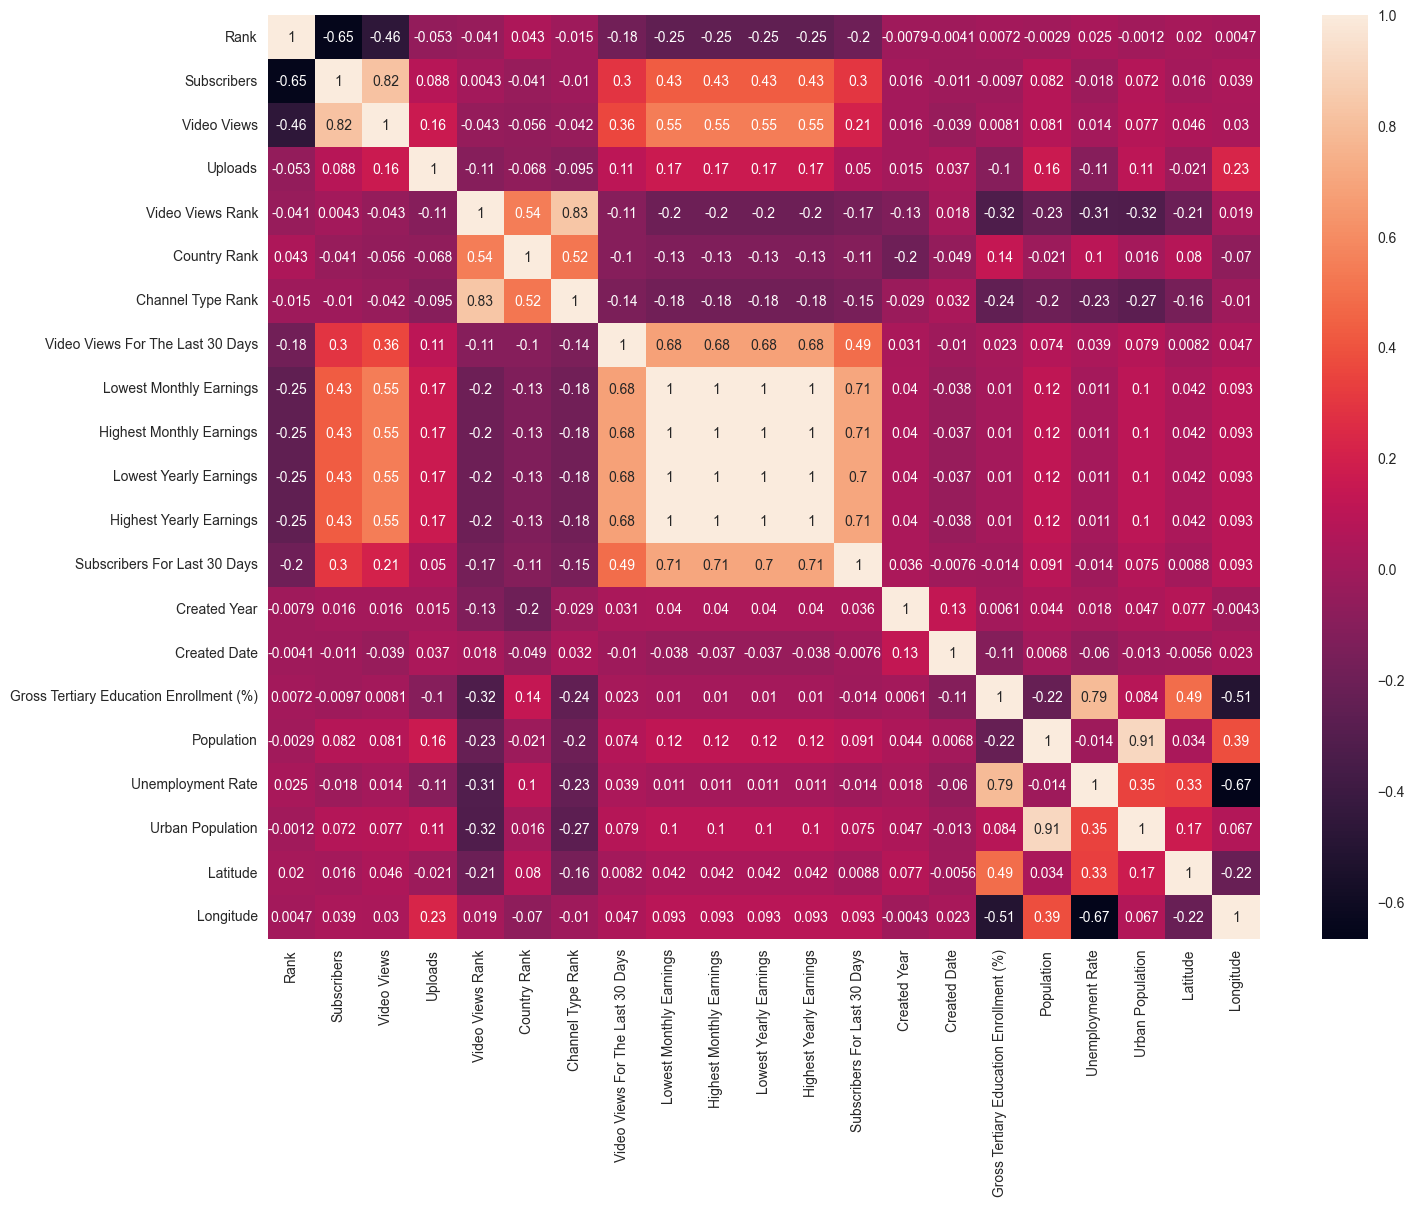

In [486]:
# Adjust the default figure size for matplotlib plots
plt.rcParams['figure.figsize'] = (16, 12)

# Generate correlation matrix heatmap
sns.heatmap(df.corr(), annot = True)

# Display the correlation matrix heatmap
plt.show()

Correlation MAtrix Heatmap을 기반으로 자세히 살펴볼 가치가 있는 사항들을 뽑아본다.

- Subscribers와 Video Views 간에는 강한 양의 상관관계가 있어서 구독자가 많은 채널의 조회수가 더 높은 경향이 있음을 시사한다. 해당 채널의 동영상 조회수 중에서 기존 구독자와 비구독자 시청자의 비율이 각각 얼마나 되는지와 다양한 동영상 카테고리에 이러한 경향이 있는지 연구해 볼 수 있다.

- Earnings는 YouTube 채널의 Subscribers 수 및 Video Views와 전부 낮거나 중간 정도의 양의 상관관계를 보여줍니다. 이는 광고 수익의 변동성이나 시청자 참여 또는 수익 창출 방법과 같은 여러 가지의 원인 때문일 수 있다. 다양한 변수(동영상 카테고리 등)에 따라 수입이 어떻게 다른지 연구하는 것이 흥미로울 것이다. 하지만, 이런 연구를 진행하기 위해서는 수익 창출을 촉진하는 요소에 대한 더 깊은 분석이 필요한데, 이와 관련된 추가 데이터가 필요할 것으로 생각된다.

- Earnings를 동영상 Uploads 횟수와 비교해보면 약간의(무시할 수 있는 정도의) 양의 상관관계가 있는데, 이는 동영상을 더 많이 업로드한다고 해서 반드시 수익이 증가하는 것은 아니라는 점을 시사한다. 이를 바탕으로 높은 수익과 상대적으로 낮은 동영상 업로드가 발생하는 경우, 탐색할 가치가 있는 특정 트렌드나 관계가 있는지 확인한다.

### 5-3. Top 20 YouTube Channels by number of Subscribers

In [487]:
# Select columns to show in output
selected_columns = ['Youtuber', 'Subscribers']

# Filter df for top 10 most subscribed YouTube channels 
top_10_channels = df.loc[0:9, selected_columns]

# Sort values so that highest output is descending, this is for the horizontal bar chart
top_10_channels_desc = top_10_channels.sort_values(by = 'Subscribers', ascending = True)

# Validate filtered df output
print(top_10_channels_desc)

                     Youtuber  Subscribers
9                         WWE     96000000
8           Zee Music Company     96700000
7               Vlad and Niki     98900000
6                 Like Nastya    106000000
5                   PewDiePie    111000000
4             Kids Diana Show    112000000
3                   SET India    159000000
2  Cocomelon - Nursery Rhymes    162000000
1                     MrBeast    166000000
0                    T-Series    245000000


In [488]:
# Reflect 'Subscriber' in millions
top_10_channels['Subscribers (mn.)'] = (top_10_channels['Subscribers'] / 1000000).astype(int)
top_10_channels_desc['Subscribers (mn.)'] = (top_10_channels_desc['Subscribers'] / 1000000).astype(int)

# Select columns to show in output
top_10_channels_desc = top_10_channels_desc[['Youtuber', 'Subscribers (mn.)']]

# Validate sorted output
print(top_10_channels_desc)

                     Youtuber  Subscribers (mn.)
9                         WWE                 96
8           Zee Music Company                 96
7               Vlad and Niki                 98
6                 Like Nastya                106
5                   PewDiePie                111
4             Kids Diana Show                112
3                   SET India                159
2  Cocomelon - Nursery Rhymes                162
1                     MrBeast                166
0                    T-Series                245


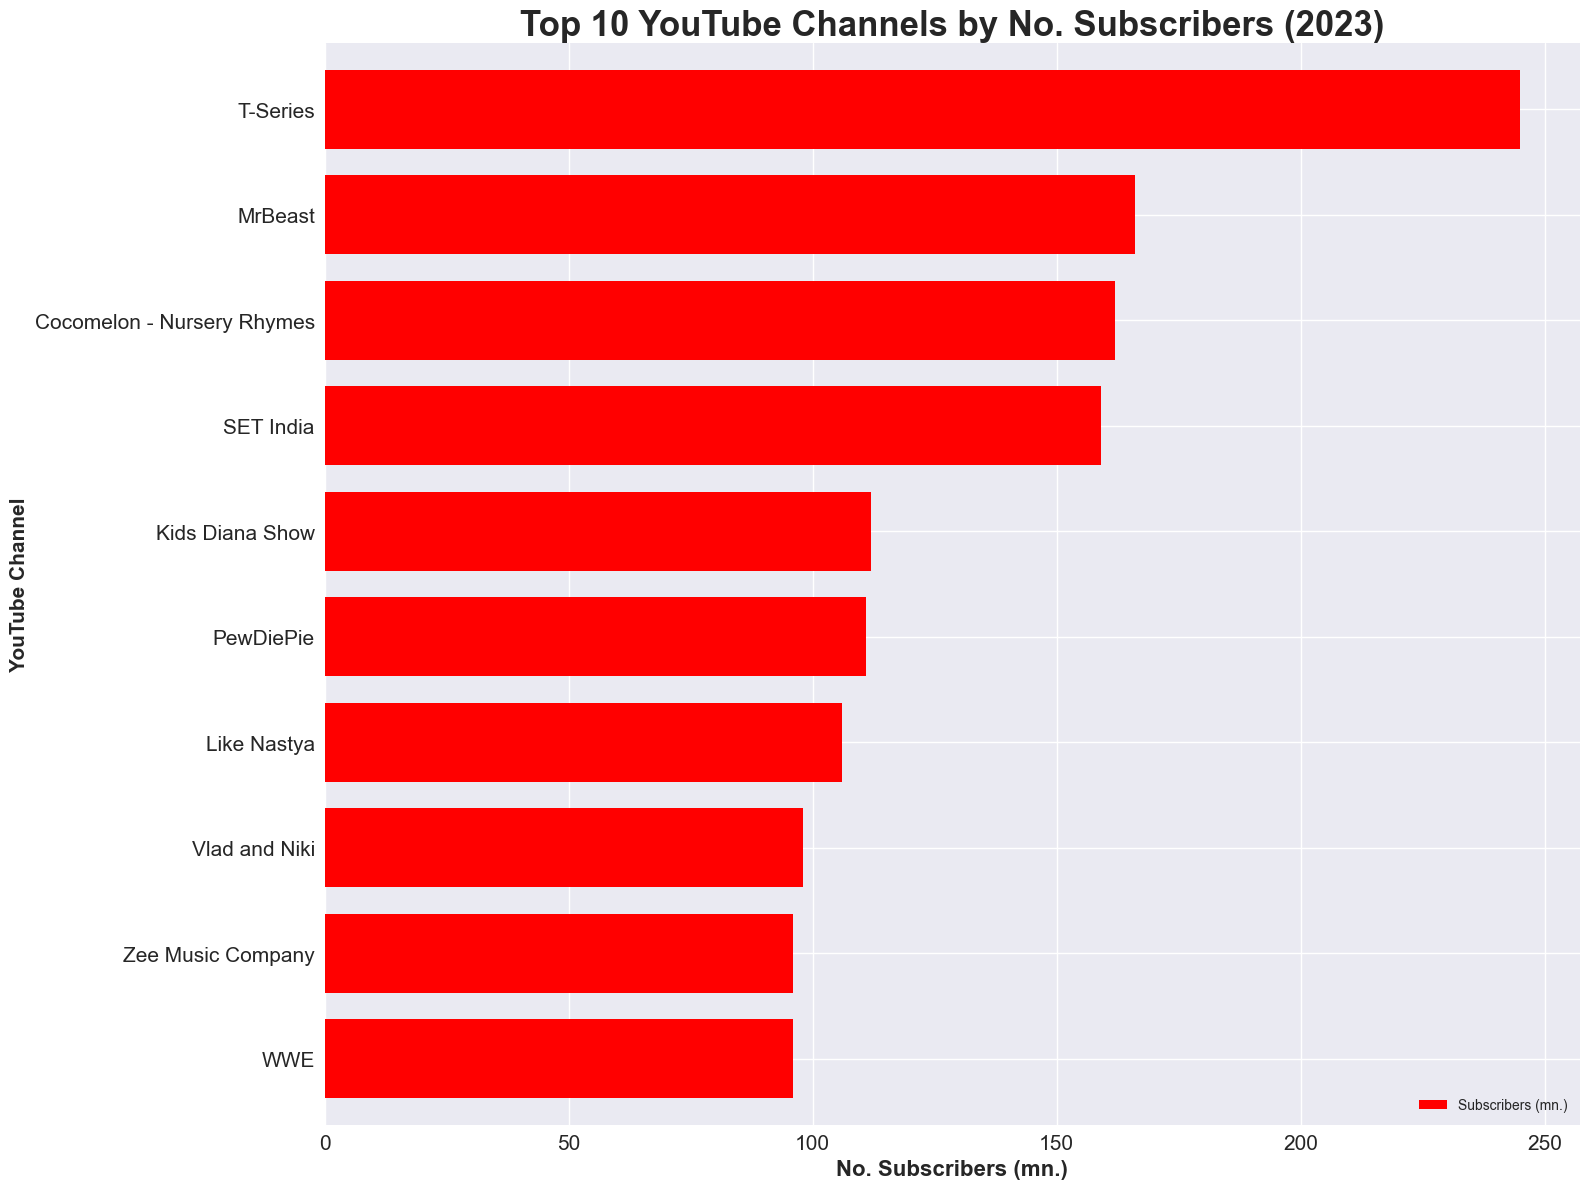

In [489]:
# Plot df as a horizontal bar chart
top_10_channels_desc.plot.barh(x = 'Youtuber', y = 'Subscribers (mn.)', stacked = True, color = '#FF0000', width = 0.75)

# Adjust chart formatting 
plt.title('Top 10 YouTube Channels by No. Subscribers (2023)', fontsize = 25, weight = 'bold')
plt.xlabel('No. Subscribers (mn.)', fontsize = 16,  weight = 'bold')
plt.ylabel('YouTube Channel', fontsize = 15, weight = 'bold')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.tight_layout()
plt.show()

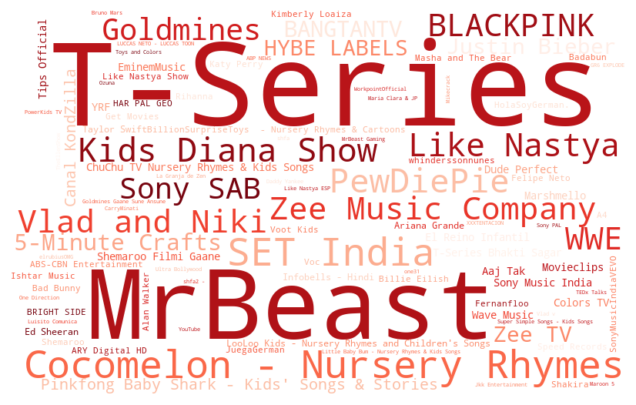

In [490]:
youtubers_data = dict(zip(df['Youtuber'].tolist(), df['Subscribers'].tolist()))

plt.figure(figsize=(30,5))

wc = WordCloud(width=800,
               height=500,
               max_words=100,
               colormap='Reds',
               contour_color='black',
               contour_width=3,
               background_color='white').generate_from_frequencies(youtubers_data)

plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

- T-Series'는 약 2억 5천만 명의 구독자를 자랑하며 가장 많이 구독하는 YouTube 채널 경쟁에서 결정적으로 선두를 달리고 있다.

- 'Cocomelon - Nursery Rhymes' 및 'Kids Diana Show'와 같은 채널의 인기는 어린이 엔터테인먼트 채널에 크게 의존하는 현대 육아의 일반적인 추세를 강조한다.

- 90년대, 2000년대 초반이 전성기라는 인식과 달리 'WWE'는 2023년에도 여전히 왕성한 활동과 인기를 이어가고 있다.

### 5-4. Top 10 YouTube Channels' Categories by number of YouTube Channels

In [491]:
# Calculate the number of YouTube channels in each category & select the top 10 values
category_counts_asc = df['Category'].value_counts(ascending = True)
top_10_categories_asc = category_counts_asc.tail(10)

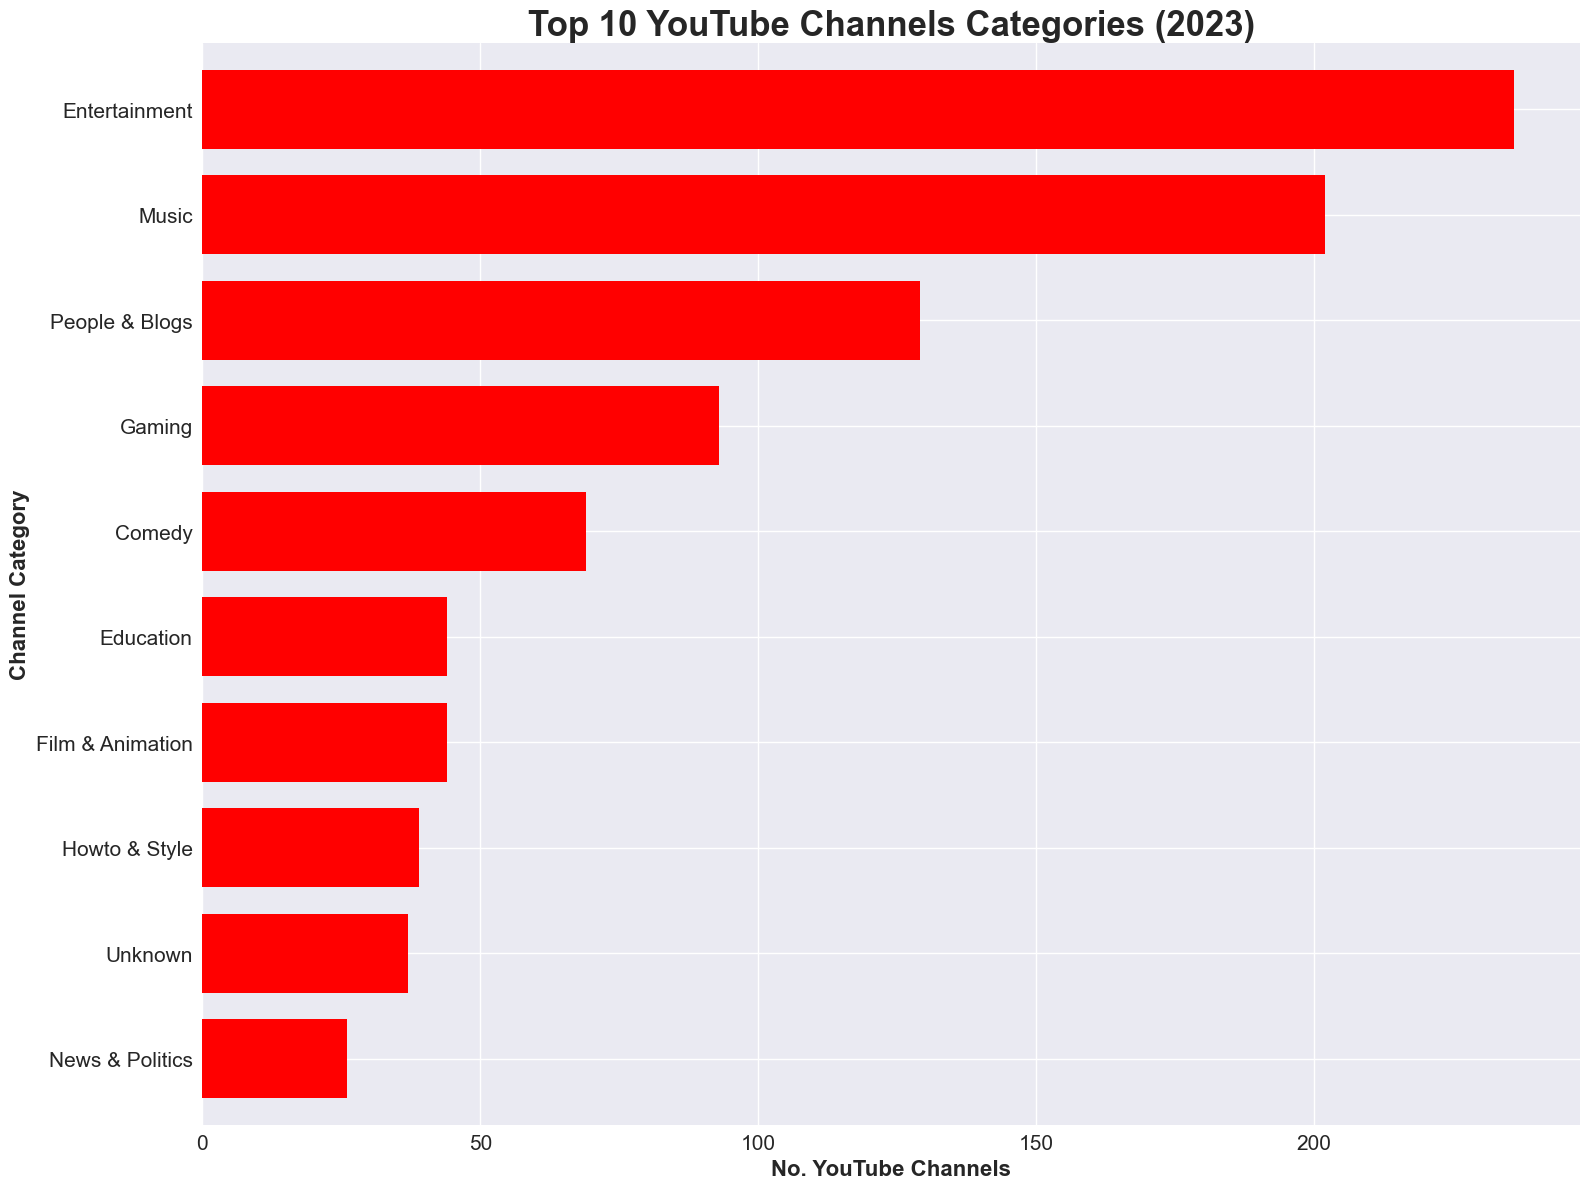

In [492]:
# Plot df as a horizontal bar chart
top_10_categories_asc.plot.barh(x = 'No. YouTube Channels', y = 'Category', stacked = True, color = '#FF0000', width = 0.75)

# Adjust chart formatting 
plt.title('Top 10 YouTube Channels Categories (2023)', fontsize = 25, weight = 'bold')
plt.xlabel('No. YouTube Channels', fontsize = 16,  weight = 'bold')
plt.ylabel('Channel Category', fontsize = 16, weight = 'bold')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.tight_layout()
plt.show()

- 시청자들은 주로 엔터테인먼트를 위해 YouTube를 찾는다. 이는 'Entertainment', 'Music', 'Gaming', 'Comedy'와 같은 카테고리가 상위 5개 채널 카테고리 중 4개를 차지하는 것을 보면 알 수 있다.

- 'Music' 카테고리는 인기 순위 2위에 올랐는데, 이는 최근 'YouTube Music' 도입(Spotify 및 Amazon Music과 같은 다른 유명 음악 스트리밍 플랫폼과 경쟁하기 위해 시작)에 따른 것으로 보인다.

- YouTube에는 교육용 콘텐츠에 대한 수요가 눈에 띄게 존재한다는 것을 알 수 있다. 이는 'Education' 및 'Howto & Style' 카테고리로 강조되며, 두 카테고리 모두 상위 10개 채널 카테고리 내에서 들어가있다.

### 5-5 Which Countries have the Highest Number of YouTubers?

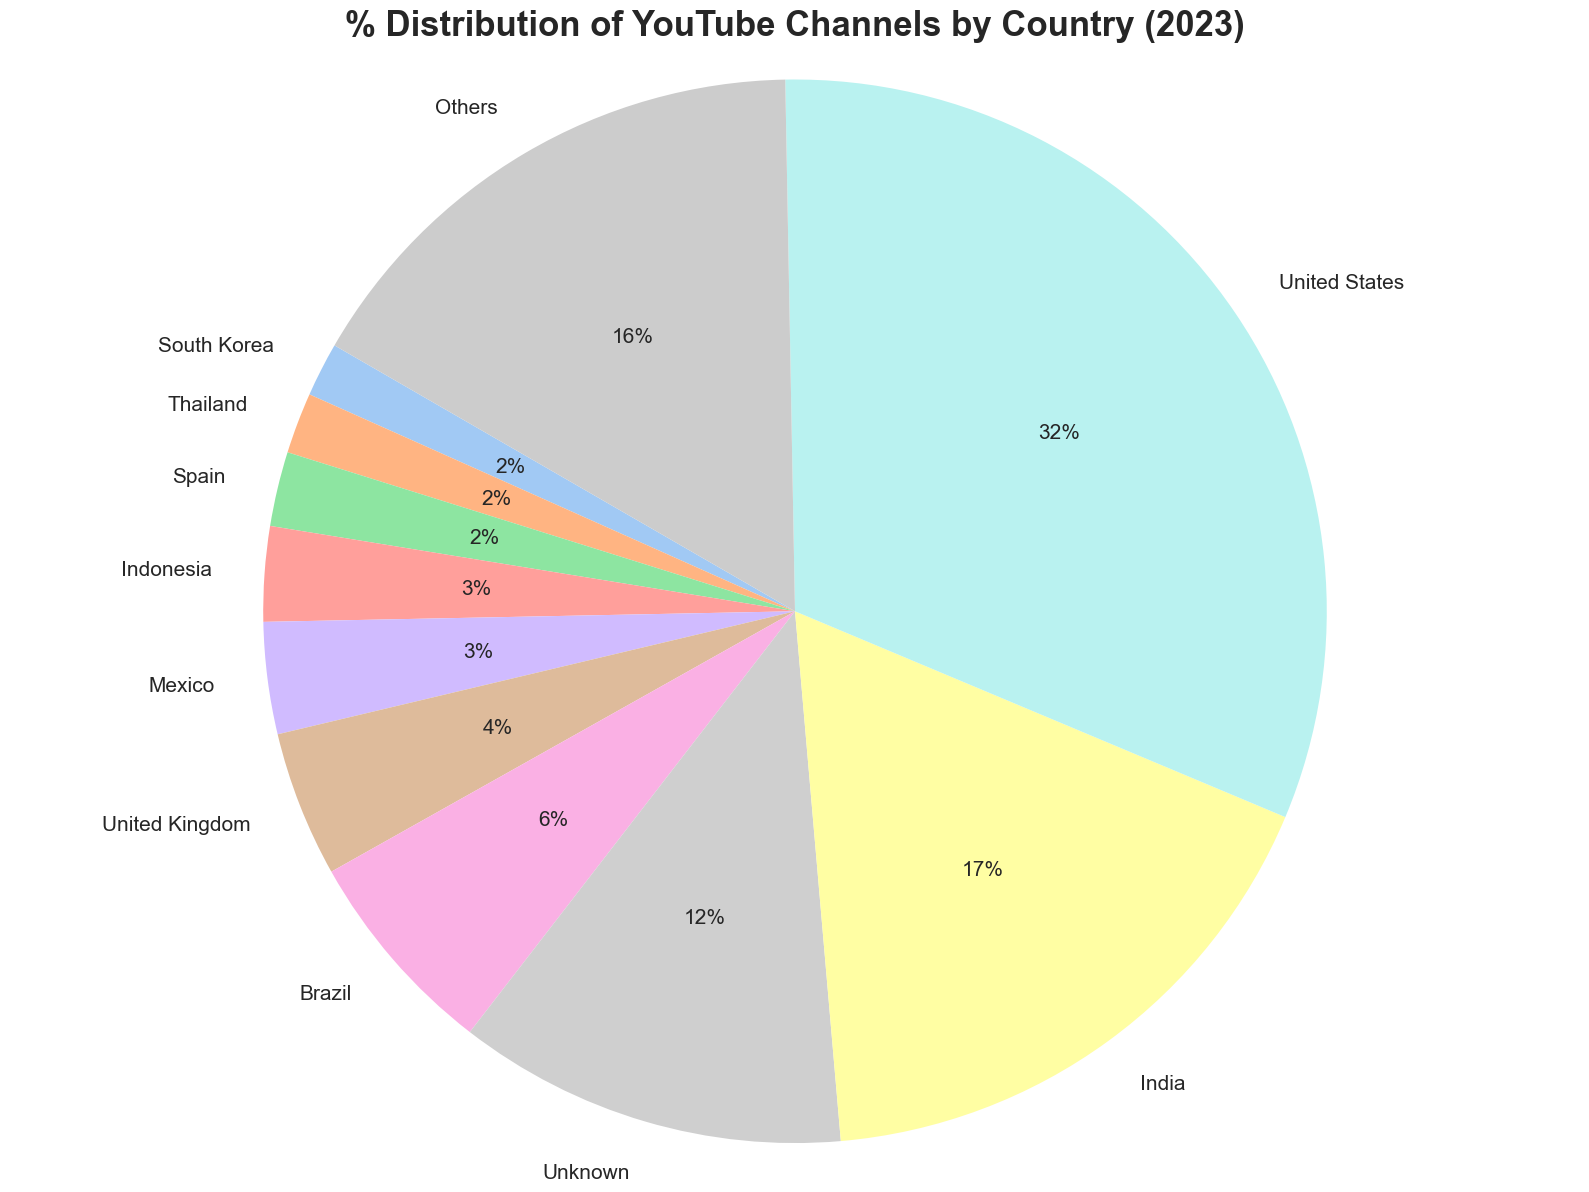

In [493]:
# Calculate the number of YouTuber channels in each country
country_counts_asc = df['Country'].value_counts(ascending = True)

# Select the top 10 countries based on the number of YouTube channels
top_10_countries = country_counts_asc.tail(10)

# Data for the top 10 categories and the sum of the remaining categories
data = top_10_countries.tolist()
data += [country_counts_asc[:-10].sum()]

# Labels for the top 10 categories and 'Others' for the remaining categories
labels = top_10_countries.index.tolist() + ['Others']

# Set colour palette for the top 10 categories & a seperate colour for 'Others'
colors = sns.color_palette("pastel", 10)

# Gray color for 'Others'
colors += [(0.8, 0.8, 0.8)]

# create a pie chart using Matplotlib with adjusted start angle and larger font size
wedges, texts, autotexts = plt.pie(data, labels = labels, autopct = '%1.0f%%', colors = colors, startangle = 150, textprops = {'fontsize': 15})

# equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# increase the font size of the pie chart labels and percentage values
for text in texts:
    text.set_fontsize(15)
for autotext in autotexts:
    autotext.set_fontsize(15)
    
# Adjust chart formatting 
plt.title('% Distribution of YouTube Channels by Country (2023)', fontsize = 25, weight = 'bold')
plt.tight_layout()

- 미국과 인도는 2023년 상위 YouTube 채널의 글로벌 순위를 주도하며, 이 데이터셋에 있는 모든 채널의 약 50%를 차지한다.

- 작지 않은 비율인 12%의 채널에서는 국가가 Unknown으로 표기되어 있다. 이와 관련된 누락 데이터를 획득하면 상위 10개 국가의 구성에 영향을 미칠 수도 있을 것이다.

- 원형 차트는 상위 YouTube 채널 제작 측면에서 대륙 간 뚜렷한 차이를 보여주는데 북미와 아시아는 각각 약 32%와 24%를 차지하는 반면 남미와 유럽은 6%에 불과하다.

### 5-6. Is There a Correlation Between the Number of Subscribers and the Number of Video Views?

In [494]:
# Create new subset for expressing values in millions
df_mns = df

# Create new columns to support visualisation
df_mns['Subscribers (mn.)'] = (df_mns['Subscribers'] / 1000000).astype(int)
df_mns['Video Views (bn.)'] = (df_mns['Video Views'] / 1000000000).astype(int)
df_mns['Uploads (k.)'] = (df_mns['Uploads'] / 1000)

# Create new subset for scatter plot
df_sub_pop = df_mns[['Subscribers (mn.)', 'Video Views (bn.)']]
df_sub_pop

,Subscribers (mn.),Video Views (bn.)
0,245,228
1,166,28
2,162,164
3,159,148
4,112,93
...,...,...
966,12,9
967,12,1
968,12,2
969,12,0


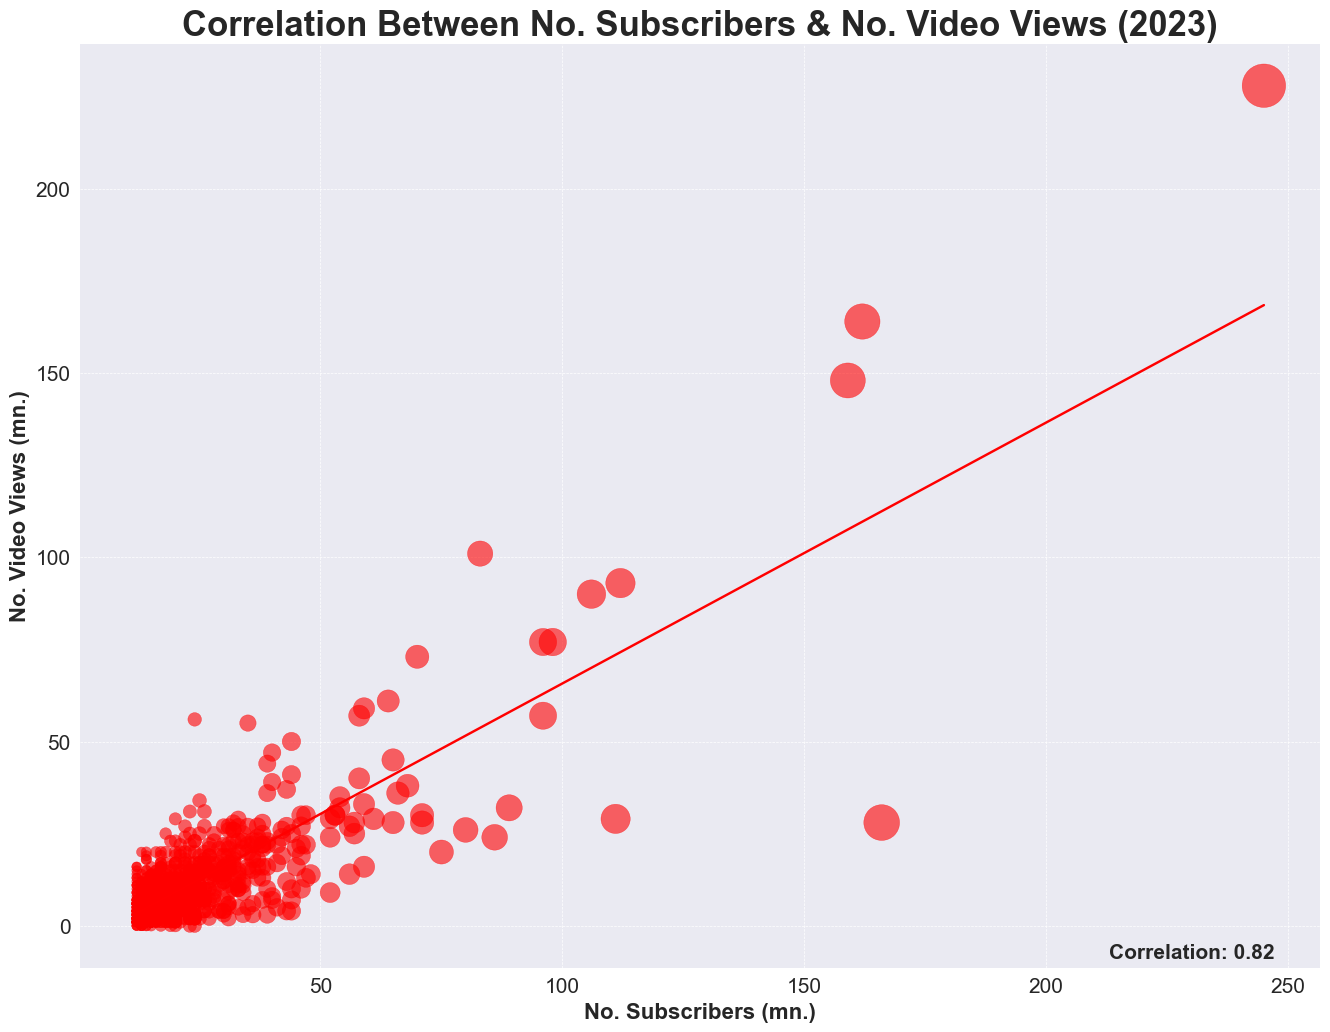

In [495]:
# Calculate the correlation coefficient
correlation = df_sub_pop['Subscribers (mn.)'].corr(df_sub_pop['Video Views (bn.)'])

# Create linear regression for trend line
m, b = np.polyfit(df_sub_pop['Subscribers (mn.)'], df_sub_pop['Video Views (bn.)'], 1)

# Set scaling factor of circle size
scaling_factor = 4

# Calculate the size of circles 
sizes = df_sub_pop['Subscribers (mn.)'] * scaling_factor

# Set figuresize
plt.figure(figsize=(16, 12))

# Plot df as a scatter
plt.scatter(df_sub_pop['Subscribers (mn.)'], df_sub_pop['Video Views (bn.)'], s = sizes, color = '#FF0000', alpha=0.6)

# Plot trendline
plt.plot(df_sub_pop['Subscribers (mn.)'], m * df_sub_pop['Subscribers (mn.)'] + b, color='#FF0000')

# Adjust chart formatting 
plt.title('Correlation Between No. Subscribers & No. Video Views (2023)', fontsize = 25, weight = 'bold')
plt.xlabel('No. Subscribers (mn.)', fontsize = 16,  weight = 'bold')
plt.ylabel('No. Video Views (mn.)', fontsize = 16,  weight = 'bold')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.grid(True, which = 'both', linestyle = '--', linewidth = 0.5)

plt.annotate(f'Correlation: {correlation:.2f}', 
            xy = (0.83, 0.01), 
            xycoords = 'axes fraction', 
            fontsize = 15, 
            weight = 'bold')

plt.show()

- 본 조의 초기 인사이트에 따르면, 구독자와 동영상 조회수 간에 뚜렷한 긍정적인 상관관계가 있는 것이 분명하다. 이는 구독자 기반의 시청자 비율이 더 큰 채널이 조회수를 더 많이 달성하는 경우가 많다는 예측을 뒷받침한다.

- Scatter Plot의 대부분의 데이터 포인트는 구독자 및 동영상 조회수 모두에 대해서 낮은 범위에 위치해 있다. 이와 대조적으로 몇몇 특이한 채널은 훨씬 더 많은 audience를 보이는데, 이 채널들의 audience 참여 촉진 전략에 대해 연구하기 위해 이러한 이상치를 더 깊이 파고드는 것도 좋은 연구 방향이 될 수 있다.

### 5-7. Is There a Correlation Between the Number of Subscribers and the Number of Video Uploads?

In [496]:
# Create new variable for expressing values in millions
df_mns = df

# Create new df for scatter plot
df_sub_pop_2 = df_mns[['Subscribers (mn.)', 'Uploads (k.)']]
df_sub_pop_2

,Subscribers (mn.),Uploads (k.)
0,245,20.082
1,166,0.741
2,162,0.966
3,159,116.536
4,112,1.111
...,...,...
966,12,1.200
967,12,1.500
968,12,2.452
969,12,0.039


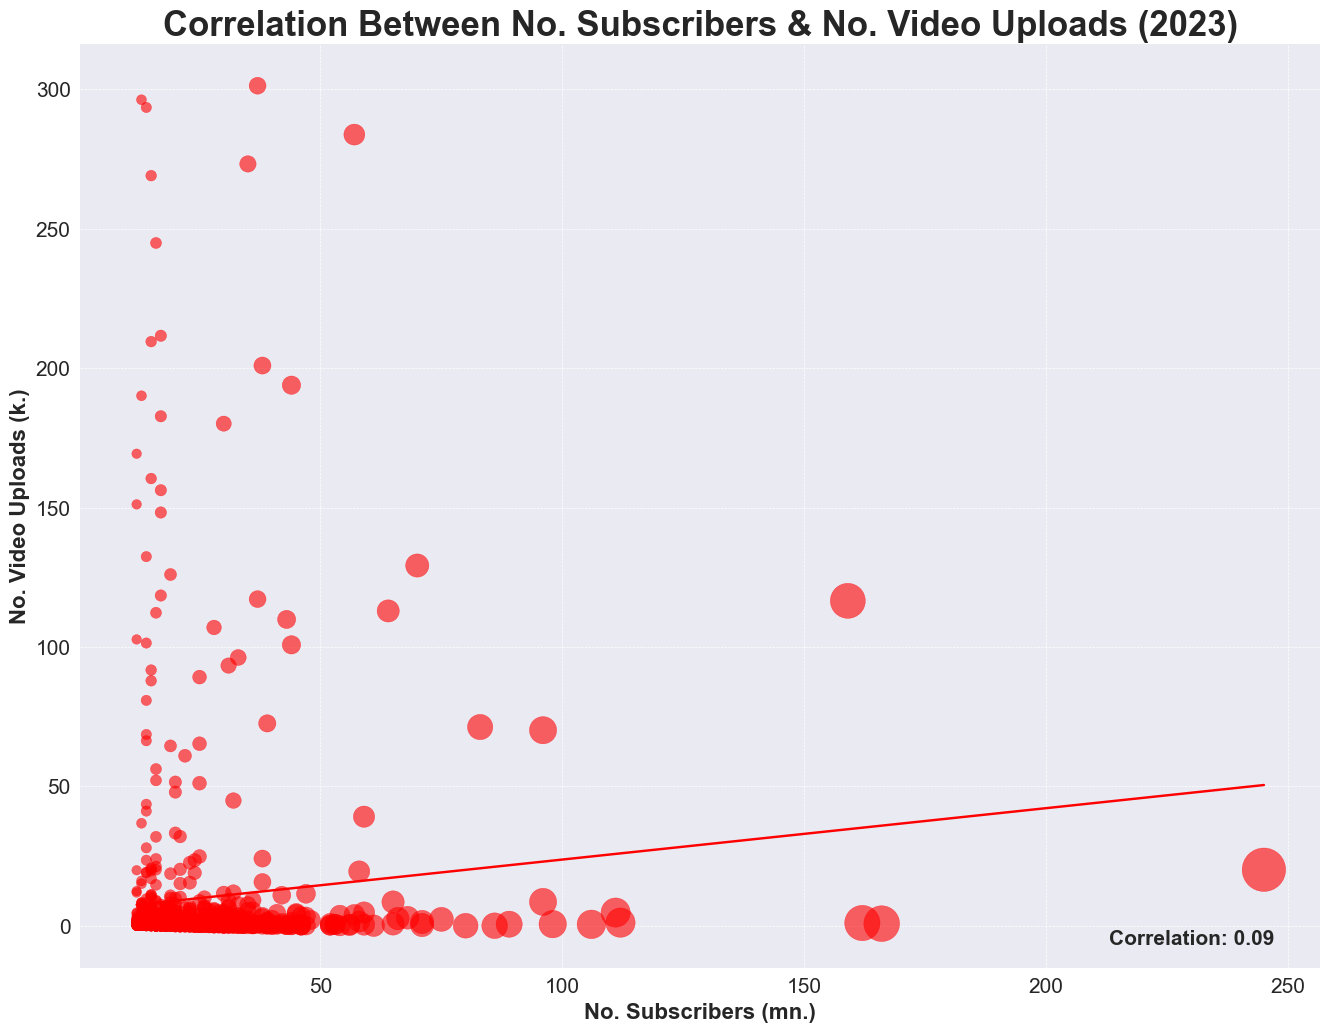

In [497]:
# Calculate the correlation coefficient
correlation = df_sub_pop_2['Subscribers (mn.)'].corr(df_sub_pop_2['Uploads (k.)'])

# Create linear regression for trend line
m, b = np.polyfit(df_sub_pop_2['Subscribers (mn.)'], df_sub_pop_2['Uploads (k.)'], 1)

# Set scaling factor of circle size
scaling_factor = 4 

# Calculate the size of circles 
sizes = df_sub_pop_2['Subscribers (mn.)'] * scaling_factor

# Set figuresize
plt.figure(figsize = (16, 12))

# Plot df as a scatter
plt.scatter(df_sub_pop_2['Subscribers (mn.)'], df_sub_pop_2['Uploads (k.)'], s = sizes, color = '#FF0000', alpha = 0.6)

# Plot trendline
plt.plot(df_sub_pop_2['Subscribers (mn.)'], m * df_sub_pop_2['Subscribers (mn.)'] + b, color = '#FF0000')

# Adjust chart formatting 
plt.title('Correlation Between No. Subscribers & No. Video Uploads (2023)', fontsize = 25, weight = 'bold')
plt.xlabel('No. Subscribers (mn.)', fontsize = 16, weight = 'bold')
plt.ylabel('No. Video Uploads (k.)', fontsize = 16, weight = 'bold')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.grid(True, which = 'both', linestyle = '--', linewidth = 0.5)

plt.annotate(f'Correlation: {correlation:.2f}', 
             xy = (0.83, 0.025), 
             xycoords = 'axes fraction', 
             fontsize = 15, 
             weight = 'bold')

plt.show()

- 채널의 구독자 수와 업로드한 동영상 수 사이에는 약간의(무시해도 괜찮을 정도의) 양의 상관관계가 존재한다. 이는 단순히 동영상을 업로드하는 양보다는 동영상의 품질과 콘텐츠가 구독자를 확보하는 데 더 중요한 역할을 하는 것을 시사한다.

- 일부 채널은 구독자 수는 적지만 업로드하는 동영상 수가 눈에 띄게 많아 독특한 대비를 보여준다. 이는 지속적으로 비디오를 제작하는 robust한 콘텐츠 팀의 존재라는 것을 시사한다. 이러한 채널은 뉴스 헤드라인이나 인터뷰 발췌문과 같은 짧은 길이의 동영상을 매일 여러 개 업로드하는 것으로 알려진 뉴스, 엔터테인먼트 또는 음악 분야에 속하는 채널일 가능성이 높다.

In [498]:
fig = make_subplots(rows=1, cols=3)

fig.update_layout(title_text='Boxplot of Video Views & Video Uploads & Subscribers',
                  uniformtext_minsize=12,
                  uniformtext_mode='hide')

fig.add_trace(go.Box(y=df['Video Views'],
                     name='Video Views',
                     boxpoints='outliers',), row=1, col=1)

fig.add_trace(go.Box(y=df['Uploads'],
                     name='Video Uploads',
                     boxpoints='outliers',), row=1, col=2)

fig.add_trace(go.Box(y=df['Subscribers'],
                     name='Subscribers',
                     boxpoints='outliers',), row=1, col=3)

fig.update_layout(
    template='plotly_white'
)

fig.show()